# Importando Ferramentas

In [1]:
# Instalando API da Base dos Dados
#!pip install basedosdados

# Importando Ferramentas Básicas
import pandas             as pd
import basedosdados       as bd
import seaborn            as sns
import matplotlib.pyplot  as plt

from ipywidgets           import interact

import json

# Coloque aqui seu ID
Project_ID = 'steam-snowfall-306819'

# Importando Dados

In [2]:
# Visualizando informações dos dados
bd.list_datasets()


dataset_id: 
	br_abrinq_oca 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_ana_atlas_esgotos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_anvisa_medicamentos_industrializados 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_bd_diretorios_brasil 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_camara_atividade_legislativa 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_camara_dados_abertos 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_cgu_servidores_executivo_federal 
-----------------------------------------------------------------------------------------------
dataset_id: 
	br_geobr_mapas 
-

In [3]:
# Lendo os dados
idh_municipios = bd.read_table(dataset_id = 'mundo_onu_adh', 
                                       table_id = 'municipios',
                                       billing_project_id = Project_ID)

Downloading: 100%|████████████████████████████████████████████████████████████| 16695/16695 [00:29<00:00, 567.22rows/s]


In [4]:
# Visualizando a tabela de IDH dos Municípios
idh_municipios.head(5)

,id_municipio,ano,expectativa_vida,fecundidade_total,mortalidade_1,mortalidade_5,razao_dependencia,prob_sobrevivencia_40,prob_sobrevivencia_60,taxa_envelhecimento,...,pia,pia_10_14,pia_15_17,pia_18_mais,indice_escolaridade,indice_frequencia_escolar,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,62.01,4.08,45.58,58.05,73.50,83.81,66.87,1.82,...,NaN,NaN,NaN,NaN,0.117,0.109,0.329,0.112,0.617,0.516
1,1100023,1991,66.02,3.72,32.39,41.41,69.97,88.08,74.23,1.82,...,NaN,NaN,NaN,NaN,0.200,0.199,0.432,0.199,0.684,0.593
2,1100031,1991,63.16,3.89,41.52,52.94,77.23,85.09,69.00,2.59,...,NaN,NaN,NaN,NaN,0.111,0.106,0.309,0.108,0.636,0.430
3,1100049,1991,65.03,3.81,35.37,45.19,71.11,87.08,72.44,2.47,...,NaN,NaN,NaN,NaN,0.176,0.169,0.407,0.171,0.667,0.593
4,1100056,1991,62.73,3.55,43.00,54.82,71.09,84.62,68.20,2.46,...,NaN,NaN,NaN,NaN,0.152,0.175,0.386,0.167,0.629,0.547


In [5]:
for idh_municipio in idh_municipios.columns:
    print(idh_municipio)

id_municipio
ano
expectativa_vida
fecundidade_total
mortalidade_1
mortalidade_5
razao_dependencia
prob_sobrevivencia_40
prob_sobrevivencia_60
taxa_envelhecimento
expectativa_anos_estudo
taxa_analfabetismo_11_a_14
taxa_analfabetismo_15_a_17
taxa_analfabetismo_15_mais
taxa_analfabetismo_18_a_24
taxa_analfabetismo_18_mais
taxa_analfabetismo_25_a_29
taxa_analfabetismo_25_mais
taxa_atraso_0_basico
taxa_atraso_0_fundamental
taxa_atraso_0_medio
taxa_atraso_1_basico
taxa_atraso_1_fundamental
taxa_atraso_1_medio
taxa_atraso_2_basico
taxa_atraso_2_fundamental
taxa_atraso_2_medio
taxa_freq_bruta_basico
taxa_freq_bruta_fundamental
taxa_freq_bruta_medio
taxa_freq_bruta_pre
taxa_freq_bruta_superior
taxa_freq_liquida_basico
taxa_freq_liquida_fundamental
taxa_freq_liquida_medio
taxa_freq_liquida_pre
taxa_freq_liquida_superior
taxa_freq_0_3
taxa_freq_11_14
taxa_freq_15_17
taxa_freq_18_24
taxa_freq_25_29
taxa_freq_4_5
taxa_freq_4_6
taxa_freq_5_6
taxa_freq_6
taxa_freq_6_14
taxa_freq_6_17
taxa_freq_fundam

In [8]:
query_idh_municipios = "SELECT DISTINCT id_municipio, ano, idhm, idhm_e, idhm_l, idhm_r  FROM `basedosdados.mundo_onu_adh.municipios`;"

df_idh_municipios = bd.read_sql(query = query_idh_municipios, 
                                billing_project_id = Project_ID)

Downloading: 100%|███████████████████████████████████████████████████████████| 16695/16695 [00:02<00:00, 6819.66rows/s]


In [9]:
df_idh_municipios.head(5)

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r
0,1100015,1991,0.329,0.112,0.617,0.516
1,1100023,1991,0.432,0.199,0.684,0.593
2,1100031,1991,0.309,0.108,0.636,0.430
3,1100049,1991,0.407,0.171,0.667,0.593
4,1100056,1991,0.386,0.167,0.629,0.547


**Dicionário de Dados**

<br>

- idhm    :  `Municipal`
- idhm_e  :  `Educação`
- idhm_l  :  `Longevidade`
- idhm_r  :  `Renda` 

In [10]:
query_info_municipios = "SELECT DISTINCT id_municipio, municipio, capital_uf, uf, regiao, microrregiao, mesorregiao  FROM `basedosdados.br_bd_diretorios_brasil.municipio`;"

df_info_municipios = bd.read_sql(query = query_info_municipios, 
                                 billing_project_id = Project_ID)

Downloading: 100%|█████████████████████████████████████████████████████████████| 5570/5570 [00:01<00:00, 3106.64rows/s]


In [11]:
# Juntando as duas tabelas com base no ID municipal
df_total_municipios = df_idh_municipios.merge(df_info_municipios, 
                                              left_on = 'id_municipio', 
                                              right_on = 'id_municipio')

In [12]:
# Visualizando a tabela
df_total_municipios.head(5)

,id_municipio,ano,idhm,idhm_e,idhm_l,idhm_r,municipio,capital_uf,uf,regiao,microrregiao,mesorregiao
0,1100015,1991,0.329,0.112,0.617,0.516,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
1,1100015,2000,0.483,0.262,0.698,0.617,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
2,1100015,2010,0.641,0.526,0.763,0.657,Alta Floresta D'Oeste,0,Rondônia,Norte,Cacoal,Leste Rondoniense
3,1100023,1991,0.432,0.199,0.684,0.593,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense
4,1100023,2000,0.556,0.343,0.742,0.674,Ariquemes,0,Rondônia,Norte,Ariquemes,Leste Rondoniense


In [13]:
len(df_total_municipios["municipio"].unique())

5292

In [14]:
len(df_total_municipios["id_municipio"].unique())

5565

In [15]:
evolucao_idh_municipio = { "id_municipio": list(df_total_municipios["id_municipio"].unique()), "idhm": [], "idhm_e":[]}

lista_var_percent_idhm = []

lista_var_percent_idhm_e = []

for id_municipio in evolucao_idh_municipio["id_municipio"]:
    
    df_var_idhm = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm"].values
    
    df_var_idhm_e = df_total_municipios.loc[df_total_municipios["id_municipio"] == id_municipio, "idhm_e"].values
    
    var_percent_idhm = round(((df_var_idhm[2]/df_var_idhm[1])-1)*100,1)
        
    var_percent_idhm_e = round(((df_var_idhm_e[2]/df_var_idhm_e[1])-1)*100,1)
    
    lista_var_percent_idhm.append(var_percent_idhm)
    
    lista_var_percent_idhm_e.append(var_percent_idhm_e)
    
evolucao_idh_municipio["idhm"] = lista_var_percent_idhm    

evolucao_idh_municipio["idhm_e"] = lista_var_percent_idhm_e    


In [16]:
df_evolucao_idh = pd.DataFrame.from_dict(evolucao_idh_municipio)


In [17]:
df_evolucao_idh["idhm"].mean()

28.622318059299193

In [20]:
df_evolucao_idh.sort_values(by='idhm').reset_index(drop=True)[-50:]

,id_municipio,idhm,idhm_e
5515,2902906,74.4,260.7
5516,2100907,74.8,246.6
5517,2500577,75.1,259.1
5518,5106315,75.1,265.3
5519,1715705,75.2,254.5
5520,2901205,75.3,256.7
5521,2202778,75.5,239.7
5522,2505709,75.8,282.1
5523,2104073,76.2,275.0
5524,2103158,76.5,281.0


# Análise Exploratória de Dados

In [10]:
anos = [1991, 2000, 2010]

lista_medias_municipio = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm"].mean()\
                for ano in anos]

lista_medias_municipio_e = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_e"].mean()\
                for ano in anos]

lista_medias_municipio_l = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_l"].mean()\
                for ano in anos]

lista_medias_municipio_r = [df_idh_municipios.loc[df_idh_municipios["ano"]==ano, "idhm_r"].mean()\
                for ano in anos]


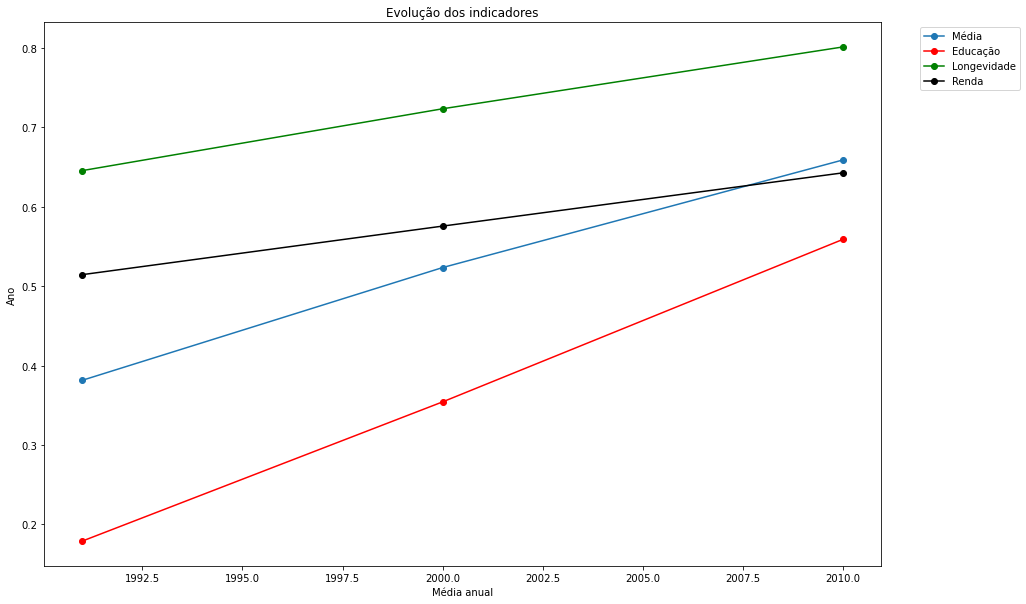

In [11]:
fig, (ax0) = plt.subplots(nrows = 1,
                            ncols = 1,
                            figsize = (15,10),
                             sharex = True)

scatter = ax0.plot(anos, 
                   lista_medias_municipio, 
                   marker='o', 
                   label='Média')


scatter = ax0.plot(anos,lista_medias_municipio_e, 
                   c = 'red', 
                   marker='o', 
                   label='Educação')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_l,
                   c = 'green', 
                   marker='o', 
                   label='Longevidade')

scatter = ax0.plot(anos, 
                   lista_medias_municipio_r, 
                   c = 'black', 
                   marker='o', 
                   label='Renda')

ax0.set(title = 'Evolução dos indicadores',
        xlabel = 'Média anual',
       ylabel = 'Ano')

ax0.legend(bbox_to_anchor = (1.04,1))


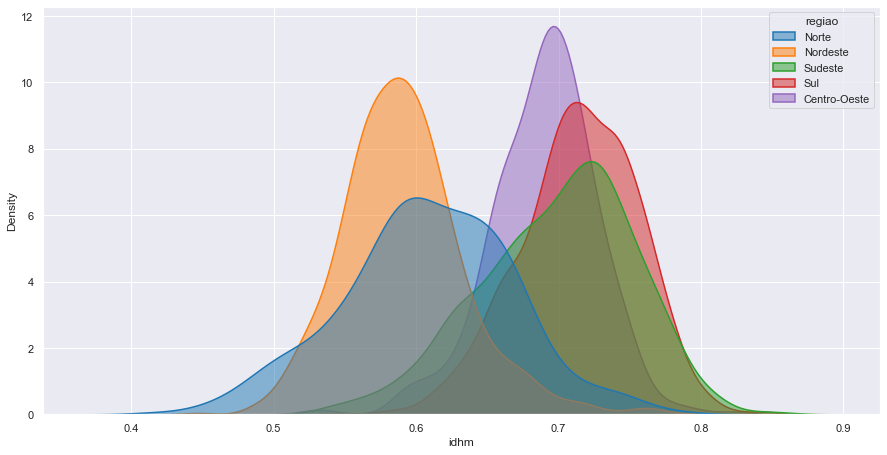

In [12]:
sns.set_theme(style="darkgrid")

fig, ax = plt.subplots(figsize = (15,7.5))

ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["ano"]==2010], 
                  x= "idhm",
                  hue = 'regiao',
                  palette = "tab10",
                  fill = True, 
                  common_norm = False, 
                  alpha = .5, 
                  linewidth = 1.5)



In [13]:
# Fixar escala

def f(ano):
  
    sns.set_theme(style="darkgrid")

    fig, ax = plt.subplots(figsize = (15,7.5))

    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios["ano"]==ano], 
                    x= "idhm",
                    hue = 'regiao',
                    palette = "tab10",
                    fill = True, 
                    common_norm = False, 
                    alpha = .5, 
                    linewidth = 1.5)

    plt.show()
    
interact(f, ano = [1991,2000,2010])

interactive(children=(Dropdown(description='ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.f(ano)>

In [14]:
def Graf_Interativo_Ano_Regiao(Ano):
    
    sns.set_theme(style="darkgrid")

    fig, (ax0, ax1, ax2, ax3) = plt.subplots( ncols = 1,
                                              nrows = 4,
                                              figsize = (15,22),
                                              sharex = True)

    ax0 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax0)
    
    ax0.set_title('IDH Total',
                   fontsize = 18,
                   y = 1.03)
    
    ax1 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_e",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax1)
    
    ax1.set_title('IDH Escolar',
                   fontsize = 18,
                   y = 1.03)
    
    ax2 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_l",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax2)
    
    ax2.set_title('IDH Longevidade',
                   fontsize = 18,
                   y = 1.03)
    
    ax3 = sns.kdeplot(  data = df_total_municipios.loc[df_total_municipios["ano"] == Ano], 
                        x = "idhm_r",
                        hue = 'regiao',
                        palette = "rocket",
                        fill = True, 
                        common_norm = False, 
                        alpha = .5, 
                        linewidth = 1.5,
                        ax = ax3)
    
    ax3.set_title('IDH Renda',
                   fontsize = 18,
                   y = 1.03)
    

    fig.suptitle('Distribuição de IDH Municipal', 
                 fontsize = 25, 
                 fontweight = 'bold', 
                 y = 0.92)
    
    ax1.legend_ = None
    ax2.legend_ = None
    ax3.legend_ = None
    
    ax0.legend(labels = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste'],
               title="Região",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.8, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'large')
    
    ax0.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax1.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax2.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    ax3.set_ylabel('Densidade', fontsize = 15, y = 0.5)
    
    plt.xlabel('IDH', fontsize = 20, x = 0.5)

    plt.show();

interact(Graf_Interativo_Ano_Regiao, Ano = [1991,2000, 2010])

interactive(children=(Dropdown(description='Ano', options=(1991, 2000, 2010), value=1991), Output()), _dom_cla…

<function __main__.Graf_Interativo_Ano_Regiao(Ano)>

In [15]:
def Graf_Interativo_Meso(UF):
    
    sns.set_theme(style="darkgrid")
    
    fig, ax = plt.subplots(figsize = (15,7.5))
    
    ax = sns.kdeplot(data = df_total_municipios.loc[df_total_municipios['uf'] == UF], 
                     x = "idhm",
                     hue = 'mesorregiao',
                     palette = "rocket",
                     fill = True, 
                     common_norm = False, 
                     alpha = .5, 
                     linewidth = 1.5)
    
    ax.legend(labels = df_total_municipios.mesorregiao.loc[df_total_municipios['uf'] == UF].unique(),
               title="Mesorregião",
               loc= 0, 
               fontsize='medium', 
               fancybox= True,
               bbox_to_anchor=(0.5, 0.6, 0.5, 0.5),
               edgecolor  = '#FFFFFF',
               title_fontsize = 'x-large')
    
    ax.set_xlabel('IDH', 
                  fontsize = 15, 
                  y = 0.5,
                  fontweight = 'bold')
    
    ax.set_ylabel('Densidade', 
                  fontsize = 15, 
                  y = 0.5,
                  fontweight = 'bold')
    
    fig.suptitle('IDH das Mesorregiões', 
                 fontsize = 20, 
                 fontweight = 'bold',
                 y = 0.94)
        
    plt.show(); 
    
interact(Graf_Interativo_Meso,
         UF = df_total_municipios.uf.unique())

interactive(children=(Dropdown(description='UF', options=('Rondônia', 'Acre', 'Amazonas', 'Roraima', 'Pará', '…

<function __main__.Graf_Interativo_Meso(UF)>

In [16]:
despesas_educação = \
['Educação',
'Ensino Fundamental',
'Atenção Básica',
'Assistência à Criança e ao Adolescente',
'Educação Infantil',
'Educação de Jovens e Adultos',
'Educação Especial',
'Cultura',
'"Patrimônio Histórico, Artístico e Arqueológico"',
'Difusão Cultural',
'Ensino Superior',
'Ensino Médio',
'Ensino Profissional',
'Educação Básica',
'Ciência e Tecnologia',
'Desenvolvimento Tecnológico e Engenharia',
'Demais Subfunções Ciência e Tecnologia',
'Demais Subfunções Cultura']

In [17]:
despesas_educação

['Educação',
 'Ensino Fundamental',
 'Atenção Básica',
 'Assistência à Criança e ao Adolescente',
 'Educação Infantil',
 'Educação de Jovens e Adultos',
 'Educação Especial',
 'Cultura',
 '"Patrimônio Histórico, Artístico e Arqueológico"',
 'Difusão Cultural',
 'Ensino Superior',
 'Ensino Médio',
 'Ensino Profissional',
 'Educação Básica',
 'Ciência e Tecnologia',
 'Desenvolvimento Tecnológico e Engenharia',
 'Demais Subfunções Ciência e Tecnologia',
 'Demais Subfunções Cultura']

In [18]:
# df_despesas = bd.read_table(dataset_id='br_tesouro_finbra', 
#             table_id='despesas_por_funcao',
#             billing_project_id=Project_ID)

In [19]:
# query_despesas = \
# """
# SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor
# FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` 
# WHERE coluna='Despesas Pagas' AND conta IN 
# ('Educação',
# 'Ensino Fundamental',
# 'Atenção Básica',
# 'Assistência à Criança e ao Adolescente',
# 'Educação Infantil',
# 'Educação de Jovens e Adultos',
# 'Educação Especial',
# 'Cultura',
# '"Patrimônio Histórico, Artístico e Arqueológico"',
# 'Difusão Cultural',
# 'Ensino Superior',
# 'Ensino Médio',
# 'Ensino Profissional',
# 'Educação Básica',
# 'Ciência e Tecnologia',
# 'Desenvolvimento Tecnológico e Engenharia',
# 'Demais Subfunções Ciência e Tecnologia',
# 'Demais Subfunções Cultura');
# """

# df_despesas = bd.read_sql(query = query_despesas, billing_project_id = Project_ID)

Downloading: 100%|████████████████████████████████████████████████████████| 306530/306530 [00:17<00:00, 17350.62rows/s]


In [65]:
query_despesas = \
"""
SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor
FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` 
WHERE coluna='Despesas Pagas' AND conta IN 
('Educação',
'Ensino Fundamental',
'Atenção Básica',
'Assistência à Criança e ao Adolescente',
'Educação Infantil',
'Educação de Jovens e Adultos',
'Ensino Superior',
'Ensino Médio',
'Educação Básica');
"""

df_despesas = bd.read_sql(query = query_despesas, billing_project_id = Project_ID)

Downloading: 100%|████████████████████████████████████████████████████████| 218344/218344 [00:12<00:00, 18148.51rows/s]


In [66]:
#SELECT DISTINCT conta FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT DISTINCT coluna FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT * FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` WHERE coluna='Despesas Liquidadas' LIMIT 100;

#SELECT id_municipio, populacao, conta, valor FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao`;

#SELECT  id_municipio, sigla_uf, ano, coluna, conta, valor  FROM `basedosdados.br_tesouro_finbra.despesas_por_funcao` WHERE coluna='Despesas Empenhadas';

In [68]:
df_despesas.loc[df_despesas['ano']==1991, :]

,id_municipio,sigla_uf,ano,coluna,conta,valor


In [69]:
df_despesas['ano'].unique()

array([2018, 2013, 2016, 2019, 2015, 2017, 2014], dtype=int64)

In [63]:
#correção pelo IGP-M (FGV)

corr_91_10 = 0.0117
corr_00_10 = 2.28

In [ ]:
with open("./imports/id_municipios.json", mode="r") as f:
  ID_MUN = json.load(f)

FileNotFoundError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ID_MUN["1100015"]

NameError: ignored

# Testes

In [ ]:
despesas_orcamentarias = bd.read_table(dataset_id='br_tesouro_finbra', 
                                       table_id='despesas_orcamentarias', 
                                       billing_project_id='steam-snowfall-306819')


Downloading: 100%|██████████████████████████████████████████████████████| 5763724/5763724 [06:38<00:00, 14464.53rows/s]


In [ ]:
despesas_orcamentarias.head(5)

,id_municipio,sigla_uf,ano,populacao,coluna,id_conta,conta,valor
0,1100015,RO,2014,25652,Despesas Empenhadas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
1,1100015,RO,2014,25652,Despesas Liquidadas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
2,1100015,RO,2014,25652,Despesas Pagas,3.3.90.49.00.00,Auxílio-Transporte,166832.00
3,1100031,RO,2014,6424,Despesas Empenhadas,3.3.20.00.00.00,Transferências à União,71701.78
4,1100031,RO,2014,6424,Despesas Empenhadas,3.3.30.81.00.00,Distribuição Constitucional ou Legal de Receitas,235376.73


# Descrição dos dados

- **Despesa Empenhada**: Valor do orçamento público formalmente reservado (pela emissão do empenho) para compromissos assumidos com terceiros.
	
- **Despesa Liquidada**: É a verificação do direito adquirido pelo credor de receber o pagamento. É o segundo estágio da execução da despesa, precedido do empenho e antecedido do pagamento.

In [ ]:
despesas_orcamentarias.to_csv('./Dados/despesas_orcamentarias.csv',sep=';',index=False)

In [ ]:
despesas_orcamentarias.shape

(5763724, 8)

In [ ]:
despesas_orcamentarias["conta"].value_counts().keys()[:50]

Index(['Aplicações Diretas', 'Outros Serviços de Terceiros - Pessoa Jurídica',
       'Despesas Correntes', 'Outras Despesas Correntes',
       'Material de Consumo', 'Despesas de Capital', 'Investimentos',
       'Pessoal e Encargos Sociais',
       'Outros Serviços de Terceiros - Pessoa Física',
       'Total Geral da Despesa', 'Equipamentos e Material Permanente',
       'Obras e Instalações', 'Despesas de Exercícios Anteriores',
       'Obrigações Patronais', 'Vencimentos e Vantagens Fixas - Pessoal Civil',
       'Sentenças Judiciais', 'Obrigações Tributárias e Contributivas',
       'Material, Bem ou Serviço para Distribuição Gratuita',
       'Diárias - Civil', 'Amortização da Dívida',
       'Indenizações e Restituições',
       'Transferências a Consórcios Públicos mediante contrato de rateio',
       'Contribuições Previdenciárias - INSS',
       'Principal da Dívida Contratual Resgatado',
       'Contratação por Tempo Determinado',
       'Transferências a Instituições Priva

In [ ]:
despesas_orcamentarias["coluna"].value_counts()

Despesas Empenhadas                            1517018
Despesas Liquidadas                            1514346
Despesas Pagas                                 1510567
Inscrição de RP Processados                     407857
Inscrição de Restos a Pagar Processados         329771
Inscrição de RP Não Processados                 267706
Inscrição de Restos a Pagar Não Processados     216459
Name: coluna, dtype: int64